In [35]:
#Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set();sns.set_theme(palette="winter")
%matplotlib inline

In [6]:
#Getting the data set 
dataFrame = pd.read_csv("Social_Network_Ads.csv")
X = dataFrame.iloc[:,:-1].values
y = dataFrame.iloc[:,-1].values

In [7]:
#Info about the dataset

In [8]:
dataFrame.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [10]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [19]:
pd.unique(dataFrame["Purchased"])

array([0, 1])

In [22]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2) #80 rows for test
print(len(X_train))
print(len(X_test))

320
80


In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
print(X_train[0,:])
print(X_test[0,:])

[-1.06675246 -0.38634438]
[ 0.79753468 -1.40447546]


In [26]:
#Creating the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [30]:
#Predicting a new variable
print("True value: ",y_test[1])
print("Predicted value: ",classifier.predict(X_test[1,:].reshape(1,-1)))

True value:  1
Predicted value:  [1]


In [29]:
#Accuracy score
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)

accuracy_score(y_test,y_pred) #Sheesh 93%

0.9375

In [31]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 3, 25]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


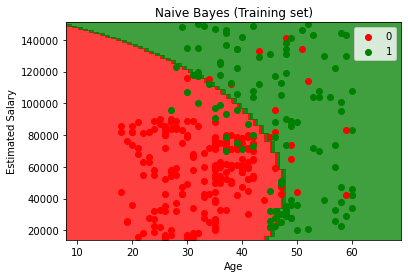

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
rng = np.random.RandomState(0)
